In [1]:
import pandas as pd
from readresults.readres_mvpa import merge_results, parse_roi_info, exclude_participants, fill_in_nvoxels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mne.stats import permutation_cluster_1samp_test
import pingouin as pg
from plotting.plot import plot_by_nvoxels, get_tfce_stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Info coupling spheres

In [ ]:
res_list = ['../../../MVPA_results/results_infocouplspheres.csv',
            '../../../MVPA_results/results_infocouplspheres_moreradii.csv']
results = merge_results(res_list)

In [ ]:
results = parse_roi_info(results)
results = exclude_participants(results)
#results = fill_in_nvoxels(results)

In [ ]:
results.radius.unique()

In [ ]:
meanres = results.groupby(['subject', 'radius']).mean().reset_index()

In [ ]:
sns.set_style('white')
p = sns.lineplot(data=meanres, x='radius', y='distance', ci=95, marker='o')
p.set_xticks(meanres.radius.unique())
p.set_xticklabels(meanres.radius.unique())
plt.axhline(0.0, linestyle='--', color='k')
plt.savefig('results_plots/ba19sphere.pdf')

In [ ]:
meanres = meanres.rename(columns={'radius': 'nvoxels'})

In [ ]:
_, _, tfce_pvals_spheres, _ = get_tfce_stats(meanres,
                              measure='distance', n_perms=10000)

In [ ]:
pg.ttest(meanres[meanres['nvoxels']==17].distance,
         0.0)

## N. voxels on BA19/37

In [2]:
res_list = ['../../../MVPA_results/results_distfromboundcorrect.csv']
results = merge_results(res_list)
results = parse_roi_info(results)
results = exclude_participants(results)
results = results.groupby(['subject', 'roi', 'hemi', 'nvoxels']).mean().reset_index()

In [3]:
bothrois_avg = results.groupby(['subject', 'roi']).mean().reset_index()

In [4]:
aov = pg.ttest(bothrois_avg[bothrois_avg['roi']=='ba-17-18'].distance,
               bothrois_avg[bothrois_avg['roi']=='ba-19-37'].distance,
               paired=True)
aov.round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.1241,29,two-sided,0.9021,"[-0.06, 0.07]",0.0237,0.196,0.0518


In [5]:
pg.ttest(bothrois_avg.groupby(['subject']).mean().reset_index().distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.432896,29,two-sided,0.021378,"[0.01, 0.12]",0.444184,2.384,0.652403


In [6]:
res_1718 = results[results['roi']=='ba-17-18']
res_1937 = results[results['roi']=='ba-19-37']

In [7]:
res_1718.distance.agg(['mean', 'sem'])

mean    0.064601
sem     0.004162
Name: distance, dtype: float64

In [8]:
meanres = res_1718.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.724192,29,two-sided,0.095319,"[-0.01, 0.14]",0.314793,0.724,0.384967


In [9]:
res_1937.distance.agg(['mean', 'sem'])

mean    0.060687
sem     0.002518
Name: distance, dtype: float64

In [10]:
meanres = res_1937.groupby(['subject']).mean().reset_index()
pg.ttest(meanres.distance, 0.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.96224,29,two-sided,0.006041,"[0.02, 0.1]",0.540829,6.918,0.816716


In [11]:
res_1937.subject.nunique()

30

In [12]:
# _, _, tfce_pvals_1937, _ = get_tfce_stats(res_1937.groupby(['subject','nvoxels']).mean().reset_index(),
#                                           measure='distance', n_perms=10000)
tfce_pvals_1937 = [0.7694, 0.561 , 0.312 , 0.1888, 0.1308, 0.1215, 0.1264, 0.0932,
       0.0761, 0.0542, 0.0932, 0.0813, 0.0916, 0.0795, 0.0714, 0.0992,
       0.0795, 0.0795, 0.0684, 0.0714, 0.0883, 0.061 , 0.0494, 0.0494,
       0.0533, 0.0486, 0.0407, 0.0438, 0.0399, 0.0368, 0.0331, 0.0277,
       0.023 , 0.0218, 0.023 , 0.0207, 0.0231, 0.0218, 0.0207, 0.0204,
       0.0164, 0.0181, 0.0154, 0.0144, 0.0146, 0.013 , 0.013 , 0.0118,
       0.011 , 0.011 , 0.0108, 0.0112, 0.0107, 0.0118, 0.0127, 0.0122,
       0.0113, 0.0113, 0.0127, 0.0137]

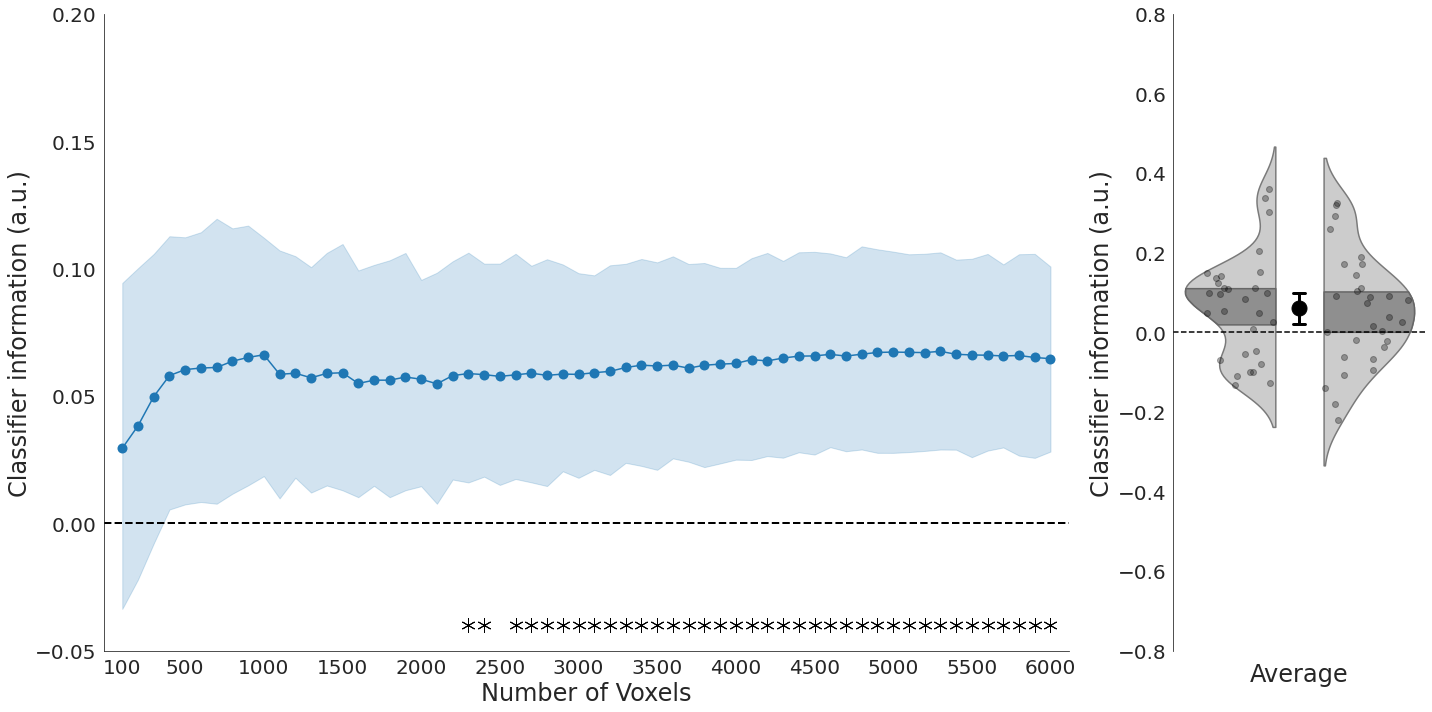

In [18]:
plot_by_nvoxels(res_1937, right_part=True, tfce_pvals=tfce_pvals_1937)
plt.savefig('results_plots/vistemp_1937_nvox.pdf')

In [16]:
# _, _, tfce_pvals_1718, _ = get_tfce_stats(res_1718.groupby(['subject','nvoxels']).mean().reset_index(),
#                                           measure='distance', n_perms=10000)
tfce_pvals_1718 = [0.5935, 0.5152, 0.569 , 0.5555, 0.4316, 0.426 , 0.2916, 0.2832,
       0.2916, 0.3109, 0.3061, 0.3013, 0.3541, 0.3868, 0.3408, 0.3013,
       0.3177, 0.3177, 0.2962, 0.3061, 0.3061, 0.3227, 0.3177, 0.3013,
       0.2785, 0.2583, 0.2328, 0.226 , 0.2365, 0.226 , 0.2224, 0.2153,
       0.2082, 0.2082, 0.2132, 0.2153, 0.2114, 0.2046, 0.1977, 0.1883,
       0.1801, 0.1801, 0.1801, 0.1801, 0.1762, 0.1762, 0.1739, 0.1739,
       0.1712, 0.1712, 0.1712, 0.1712, 0.1712, 0.1687, 0.1687, 0.1687,
       0.1687, 0.1687, 0.1687, 0.1687]

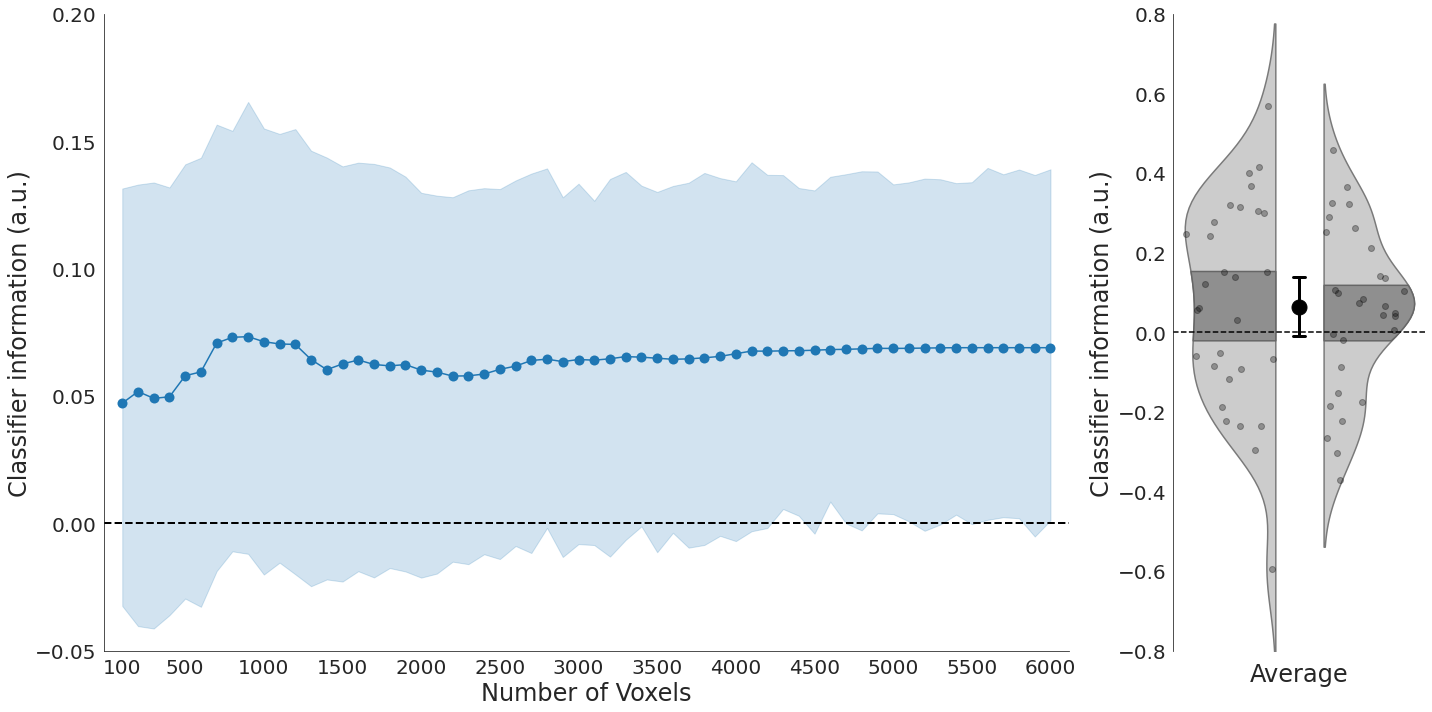

In [17]:
plot_by_nvoxels(res_1718, right_part=True, tfce_pvals=tfce_pvals_1718)
plt.savefig('results_plots/vistemp_1718_nvox.pdf')

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('white')
sns.lineplot(data=meanres[meanres['roi']=='ba-19-37'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [ ]:
subxvoxels = df_to_array_tfce(meanres[meanres['roi']=='ba-17-18'].groupby(['subject', 'nvoxels']).mean().reset_index(),
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

In [ ]:
tfce_pvals

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-17-18'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [ ]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='R')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

In [ ]:
tfce_pvals

In [ ]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='L')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

In [ ]:
tfce_pvals

In [ ]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.3, 0.3])
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-19'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 

## Info coupling ROI

In [ ]:
res_list = ['../../../MVPA_results/infocoupling_sphere']
infocouplroires = merge_results(res_list)
infocouplroires = exclude_participants(infocouplroires)

In [ ]:
infocouplroires.distance.mean()

## Full ROIs

In [ ]:
res_list = ['../../../MVPA_results/results_main_fullrois.csv']
fullroiresults = merge_results(res_list)
fullroiresults = parse_roi_info(fullroiresults)
fullroiresults = exclude_participants(fullroiresults)

In [ ]:
fullroi_meanres = fullroiresults.groupby(['roi', 'subject', 'hemi']).mean().reset_index()

In [ ]:
plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=fullroi_meanres, 
            x='roi', y='distance',
            hue='hemi', ci=95)

In [ ]:
x=float('-inf')

In [ ]:
x==float('-inf')

In [ ]:
MVPAres.groupby(['roi', 'testmodel']).mean()